# Vanishing Gradient on Deep Learning Architectures
Author: Iván Reyes-Amezcua

**Problem Formulation**
Neural Nets were sensitive to initial weights, and they tended to prematurely stop learning as gradient values decrease to infinitesimally small values due to any or both of the following reasons: 
1. Their activation functions have small ranges of gradient values
2. Their depth. 

**This phenomenon is called the vanishing gradients problem.**

**Objective**
We are going to show the problem of the vanishing gradient of deep neural networks using using **Sigmoid** and **ReLU** activation functions.

**Introduction**
Neural networks are computational models used to approximate a function $f(x) ≈ y$ that models the relationship between the dataset features $x$ and labels $y$. One of the difficulties which is faced while training deep neural network with gradient based method is the vanishing gradient problem. This problem is caused by certain **activation functions** and it becomes difficult to tune the parameters of different layers in neural network and as the number of layers in neural network increases this problem become more significant.


**Neural Network Architecture**
The architecture we are using is a fully-connected three-layer network composed as following:
- Input layer (16 neurons)
- Hidden layer (12 neurons)
- Hidden layer (10 neuron)
- Output layer (1 neuron)

**Case Study Dataset**
We use a synthethic dataset for training the network.

<img src="https://svgshare.com/i/h9M.svg">



## [Case 1] Sigmoid Function on Each Layer

$$
\sigma = \frac{1}{1+e^{-z}}
$$

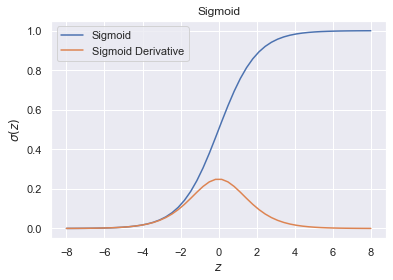

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# sigmoid derivative
def d_sigmoid(z):
    return sigmoid(z) * (1 - sigmoid(z))

x = np.linspace(-8,8)

plt.figure()
plt.plot(x, sigmoid(x), label = "Sigmoid")
plt.plot(x, d_sigmoid(x), label = "Sigmoid Derivative")
plt.grid(True)
plt.legend()
plt.xlabel("$z$")
plt.ylabel("$\sigma(z)$")
plt.title("Sigmoid")
plt.show();

## Model

In order to show the vanishing behavior, we force the model to initialize the weight with values close to 0.

In [2]:
import torch
import torch.nn.functional as F
from torch import nn

# defining our basic network
class BasicNetwork(nn.Module):
    
    def __init__(self, activation = nn.Sigmoid):
        # call constructor from superclass
        super().__init__()
        self.activation = activation
        
        # define layers
        self.layers = nn.Sequential(
            nn.Linear(16, 12),
            self.activation(),
            nn.Linear(12, 10),
            self.activation(),
            nn.Linear(10, 1),
            self.activation(),
        )
        
        self.apply(self._init_weights)
        
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.uniform_(0.0, 0.00001)
    
            if module.bias is not None:
                module.bias.data.zero_()
                
    # define our forward pass    
    def forward(self, x):
        x = self.layers(x)
        return x

In [3]:
model = BasicNetwork()
print(model)

BasicNetwork(
  (layers): Sequential(
    (0): Linear(in_features=16, out_features=12, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=12, out_features=10, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=10, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


## Synthetic Data for Classification

In [4]:
from sklearn.datasets import make_classification
import pandas as pd

X, y = make_classification(n_samples = 1000, n_features = 16, n_classes = 2, random_state = 42)
data = np.hstack([X, y.reshape(-1, 1)])
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.738900,-1.234050,1.051948,-0.998061,-0.830444,0.522514,1.001149,0.418398,0.650450,0.085318,-1.503080,1.128338,1.401599,-0.808266,-1.422620,0.978858,0.0
1,-1.031966,-2.343721,2.185095,-0.686715,-1.236136,1.254338,0.316015,0.731001,0.715734,1.288076,2.394362,0.845604,0.538435,0.014509,0.260188,-0.440259,1.0
2,-0.629200,0.020982,0.549127,-0.529993,-0.792004,-1.193379,0.032110,0.319928,-0.195593,-0.853920,1.409046,0.021021,-0.110365,1.962068,-0.067608,-1.439705,1.0
3,-0.641112,1.465105,-0.824961,-1.200819,0.787276,0.459575,-1.029923,2.017776,0.577262,0.984593,-1.450913,-1.209754,0.043908,0.790672,1.392522,1.658870,1.0
4,-0.268646,-0.809836,-0.484174,-0.966246,-0.297376,-0.246383,0.498001,0.986377,-1.542803,-0.432774,-0.160631,0.610354,-0.711973,0.793818,-0.636525,-1.836360,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.334176,-1.303791,1.082691,-0.471125,-0.413606,1.887688,1.407940,0.556553,0.486036,-1.907808,-1.547304,1.478691,-1.335482,-0.860385,-2.157337,-0.155259,0.0
996,-1.503047,1.500347,-0.618365,-0.794894,1.164412,0.925677,0.469331,0.034333,0.947512,-0.881434,0.674695,0.008290,-0.362499,0.090310,-1.421401,0.995694,0.0
997,-1.254023,0.702223,1.257613,-0.533452,-1.098679,0.044570,0.269581,0.631224,1.104997,0.272634,-0.377531,0.044727,-1.151227,0.342226,-0.758531,-0.998936,0.0
998,1.057427,1.710337,-1.903759,-0.482878,-0.258764,-0.497052,0.158713,0.054695,0.853015,-1.742082,-0.278120,-0.298488,0.441420,-0.455221,-0.917271,-0.080816,0.0


In [5]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, X, y, mode = 'train'):
        self.mode = mode
        
        if self.mode == 'train':
            self.inp = X
            self.oup = y.reshape(-1,1)
            
        else:
            self.inp = df.values
    def __len__(self):
        return len(self.inp)
    
    def __getitem__(self, idx):
        if self.mode == 'train':
            inpt  = torch.Tensor(self.inp[idx])
            oupt  = torch.Tensor(self.oup[idx])
            return {'inp': inpt, 'oup': oupt}
        
        else:
            inpt = torch.Tensor(self.inp[idx])
            return {'inp': inpt}

In [6]:
# Initialize the DataSet
data = CustomDataset(X, y)

In [7]:
from torch.utils.data import DataLoader

## Load the Dataset
data_train = DataLoader(dataset = data, batch_size = 128, shuffle = True)

## Training

In [8]:
from torch.optim import Adam

def train(model, epochs = 200, lr = 0.01):
    EPOCHS = epochs
    criterion = nn.MSELoss()
    optimizer = Adam(model.parameters(), lr = lr)

    accuracy_history = []
    loss_history = []

    l1_gradients_history = []
    l2_gradients_history = []
    l3_gradients_history = []
    
    l1_weights_history = []
    l2_weights_history = []
    l3_weights_history = []

    for epoch in range(EPOCHS):

        epoch_loss = 0
        epoch_acc = 0

        # batch training
        for bidx, batch in enumerate(data_train):

            x_train, y_train = batch['inp'], batch['oup']

            # set the gradients to zero
            model.zero_grad()
            outputs = model(x_train)

            # calcultae the gradients
            loss = criterion(outputs, y_train)
            loss.backward()

            # update the weights using the calculated gradients
            optimizer.step()

            # calculate accuracy
            epoch_acc += torch.sum(torch.round(outputs) == y_train)
            epoch_loss += loss

        epoch_acc = epoch_acc/len(data)
        accuracy_history.append(epoch_acc)
        loss_history.append(epoch_loss)

        # Save the gradients
        if (epoch % 100 == 0 or epoch+1 == EPOCHS):
            l1_g = model.layers[0].weight.grad.detach().numpy().flatten()
            l2_g = model.layers[2].weight.grad.detach().numpy().flatten()
            l3_g = model.layers[4].weight.grad.detach().numpy().flatten()
            l1_gradients_history.append(l1_g)
            l2_gradients_history.append(l2_g)
            l3_gradients_history.append(l3_g)
            
            l1_w = model.layers[0].weight.detach().numpy().flatten()
            l2_w = model.layers[2].weight.detach().numpy().flatten()
            l3_w = model.layers[4].weight.detach().numpy().flatten()
            l1_weights_history.append(l1_w)
            l2_weights_history.append(l2_w)
            l3_weights_history.append(l3_w)

        if (epoch % 20 == 0 or epoch+1 == EPOCHS):
            print('Epoch {} Train Acc : {}, Train Loss : {}'.format(epoch, epoch_acc, epoch_loss))
    
    l1 = [l1_gradients_history, l1_weights_history]
    l2 = [l2_gradients_history, l2_weights_history]
    l3 = [l3_gradients_history, l3_weights_history]
    
    return accuracy_history, loss_history, l1, l2, l3

The model learns slowly, and after a few cycles, the training may become stagnant.

In [9]:
model = BasicNetwork(nn.Sigmoid)
accuracy_history, loss_history, l1, l2, l3 = train(model, epochs = 200)

Epoch 0 Train Acc : 0.5040000081062317, Train Loss : 2.0013058185577393
Epoch 20 Train Acc : 0.8790000081062317, Train Loss : 0.8477554321289062
Epoch 40 Train Acc : 0.8809999823570251, Train Loss : 0.7866678833961487
Epoch 60 Train Acc : 0.8840000033378601, Train Loss : 0.7751678824424744
Epoch 80 Train Acc : 0.8820000290870667, Train Loss : 0.7621978521347046
Epoch 100 Train Acc : 0.8840000033378601, Train Loss : 0.7610535621643066
Epoch 120 Train Acc : 0.8820000290870667, Train Loss : 0.7544547915458679
Epoch 140 Train Acc : 0.8849999904632568, Train Loss : 0.7586092948913574
Epoch 160 Train Acc : 0.8830000162124634, Train Loss : 0.7618746161460876
Epoch 180 Train Acc : 0.8930000066757202, Train Loss : 0.7282732725143433
Epoch 199 Train Acc : 0.8989999890327454, Train Loss : 0.702365517616272


In [12]:
def plot_model_history(loss_history, accuracy_history, activation = "Sigmoid", epochs = 200):

    fig, axs = plt.subplots(1, 2, figsize=(15,5))

    fig.suptitle(f'Three-layer fully connected with {activation}')

    axs[0].plot(np.arange(0, epochs), loss_history, label = "Train Loss")
    axs[0].grid(True)
    axs[0].set_xlabel("Epoch")
    axs[0].legend()

    axs[1].plot(np.arange(0, epochs), accuracy_history,c = "orange", label = "Train Accuracy")
    axs[1].grid(True)
    axs[1].set_xlabel("Epoch")
    axs[1].legend()

    plt.show();

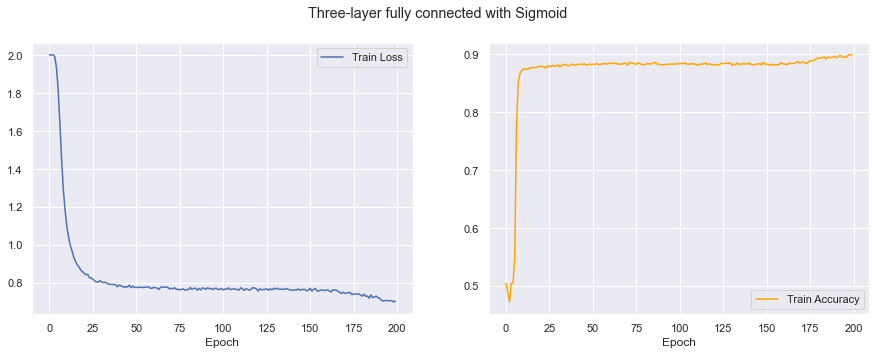

In [13]:
plot_model_history(loss_history, accuracy_history, activation = "Sigmoid")

## Analyzing the Gradient and Parameters Distribution

In [14]:
def plot_gradient_distribution(l1_gradients_history, l2_gradients_history, l3_gradients_history, activation = "Sigmoid"):
    
    fig, axs = plt.subplots(3, 3, figsize=(20,20))

    fig.suptitle(f'Gradient Distribution with {activation}')
    
    fig.subplots_adjust(top=0.95)

    axs[0, 0].hist(l1_gradients_history[0], bins=20, label = "Layer 1 - Epoch 0", color = "b");
    axs[0, 0].grid(False)
    axs[0, 0].legend()
    axs[0, 0].set_title("Epoch 0")
    axs[0, 0].set_xlabel("Gradient")
    axs[0, 0].set_ylabel("Frequency")
    
    axs[0, 1].hist(l1_gradients_history[1], bins=20, label = "Layer 1 - Epoch 50", color = "b");
    axs[0, 1].grid(False)
    axs[0, 1].legend()
    axs[0, 1].set_title("Epoch 50")
    axs[0, 1].set_xlabel("Gradient")
    axs[0, 1].set_ylabel("Frequency")
    
    
    axs[0, 2].hist(l1_gradients_history[2], bins=20, label = "Layer 1 - Epoch 200", color = "b");
    axs[0, 2].grid(False)
    axs[0, 2].legend()
    axs[0, 2].set_title("Epoch 200")
    axs[0, 2].set_xlabel("Gradient")
    axs[0, 2].set_ylabel("Frequency")
    

    axs[1, 0].hist(l2_gradients_history[0], bins=20, label = "Layer 2 - Epoch 0", color = "r");
    axs[1, 0].grid(False)
    axs[1, 0].legend()
    axs[1, 0].set_title("Epoch 0")
    axs[1, 0].set_xlabel("Gradient")
    axs[1, 0].set_ylabel("Frequency")
    
    
    axs[1, 1].hist(l2_gradients_history[1], bins=20, label = "Layer 2 - Epoch 50", color = "r");
    axs[1, 1].grid(False)
    axs[1, 1].legend()
    axs[1, 1].set_title("Epoch 50")
    axs[1, 1].set_xlabel("Gradient")
    axs[1, 1].set_ylabel("Frequency")
    
    
    axs[1, 2].hist(l2_gradients_history[2], bins=20, label = "Layer 2 - Epoch 200", color = "r");
    axs[1, 2].grid(False)
    axs[1, 2].legend()
    axs[1, 2].set_title("Epoch 200")
    axs[1, 2].set_xlabel("Gradient")
    axs[1, 2].set_ylabel("Frequency")
    

    axs[2, 0].hist(l3_gradients_history[0], bins=20, label = "Layer 3 - Epoch 0", color = "g");
    axs[2, 0].grid(False)
    axs[2, 0].legend()
    axs[2, 0].set_title("Epoch 0")
    axs[2, 0].set_xlabel("Gradient")
    axs[2, 0].set_ylabel("Frequency")
    
    
    axs[2, 1].hist(l3_gradients_history[1], bins=20, label = "Layer 3 - Epoch 50", color = "g");
    axs[2, 1].grid(False)
    axs[2, 1].legend()
    axs[2, 1].set_title("Epoch 50")
    axs[2, 1].set_xlabel("Gradient")
    axs[2, 1].set_ylabel("Frequency")
    
    
    axs[2, 2].hist(l3_gradients_history[2], bins=20, label = "Layer 3 - Epoch 200", color = "g");
    axs[2, 2].grid(False)
    axs[2, 2].legend()
    axs[2, 2].set_title("Epoch 200")
    axs[2, 2].set_xlabel("Gradient")
    axs[2, 2].set_ylabel("Frequency")
    

    plt.show()

In the next Figure, We can observe the gradient distributions of a neural network as it learns.

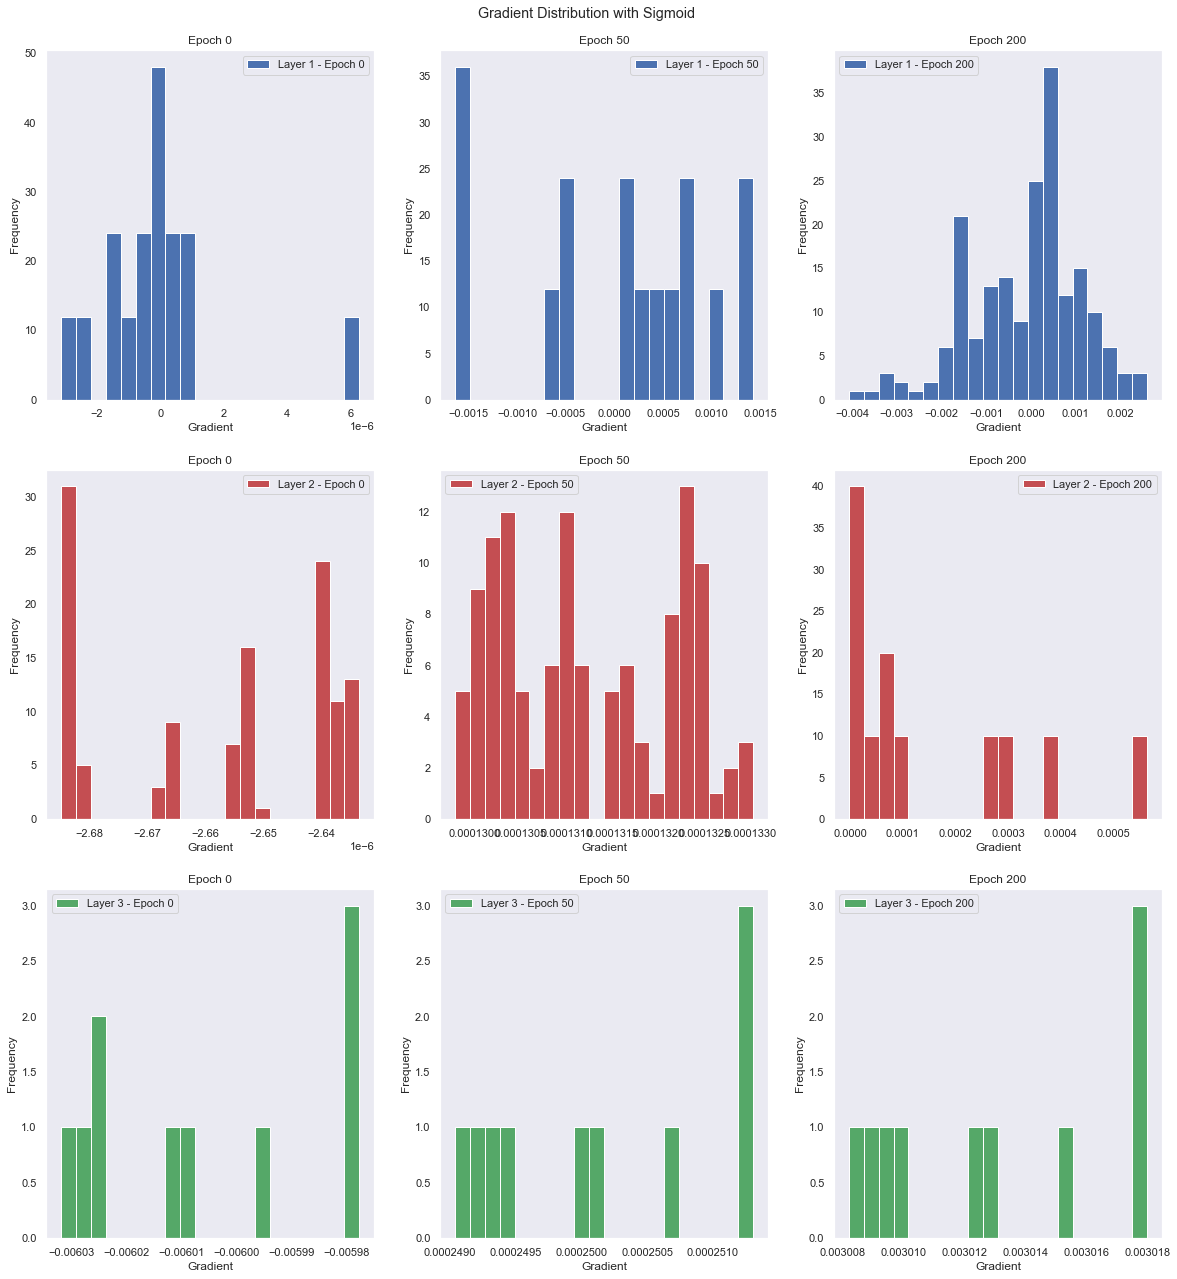

In [15]:
plot_gradient_distribution(l1[0], l2[0], l3[0], activation = "Sigmoid")

In [16]:
def plot_weights_distribution(l1_weights, l2_weights, l3_weights, activation = "Sigmoid"):
    fig, axs = plt.subplots(3, 1, figsize=(12,15))

    fig.suptitle(f'Weights Distribution with {activation}')

    fig.subplots_adjust(top=0.95)

    axs[0].hist(l1_weights[0], alpha=0.5, label = "Epoch 0" )
    axs[0].hist(l1_weights[1], alpha=0.5, label = "Epoch 50" )
    axs[0].hist(l1_weights[2], alpha=0.5, label = "Epoch 200")
    axs[0].grid(False)
    axs[0].legend()
    axs[0].set_title("Layer 1")
    axs[0].set_xlabel("Weights")
    axs[0].set_ylabel("Frequency")

    axs[1].hist(l2_weights[0], alpha=0.5, label = "Epoch 0" )
    axs[1].hist(l2_weights[1], alpha=0.5, label = "Epoch 50" )
    axs[1].hist(l2_weights[2], alpha=0.5, label = "Epoch 200")
    axs[1].grid(False)
    axs[1].legend()
    axs[1].set_title("Layer 2")
    axs[1].set_xlabel("Weights")
    axs[1].set_ylabel("Frequency")

    axs[2].hist(l3_weights[0], alpha=1, label = "Epoch 0" )
    axs[2].hist(l3_weights[1], alpha=1, label = "Epoch 50" )
    axs[2].hist(l3_weights[2], alpha=1, label = "Epoch 200")
    axs[2].grid(False)
    axs[2].legend()
    axs[2].set_title("Layer 3")
    axs[2].set_xlabel("Weights")
    axs[2].set_ylabel("Frequency")

    plt.show();

The **parameters** (weights) of the higher layers vary dramatically, whereas the **parameters** of the lower levels do not change significantly for **Vanishing** (or not at all).

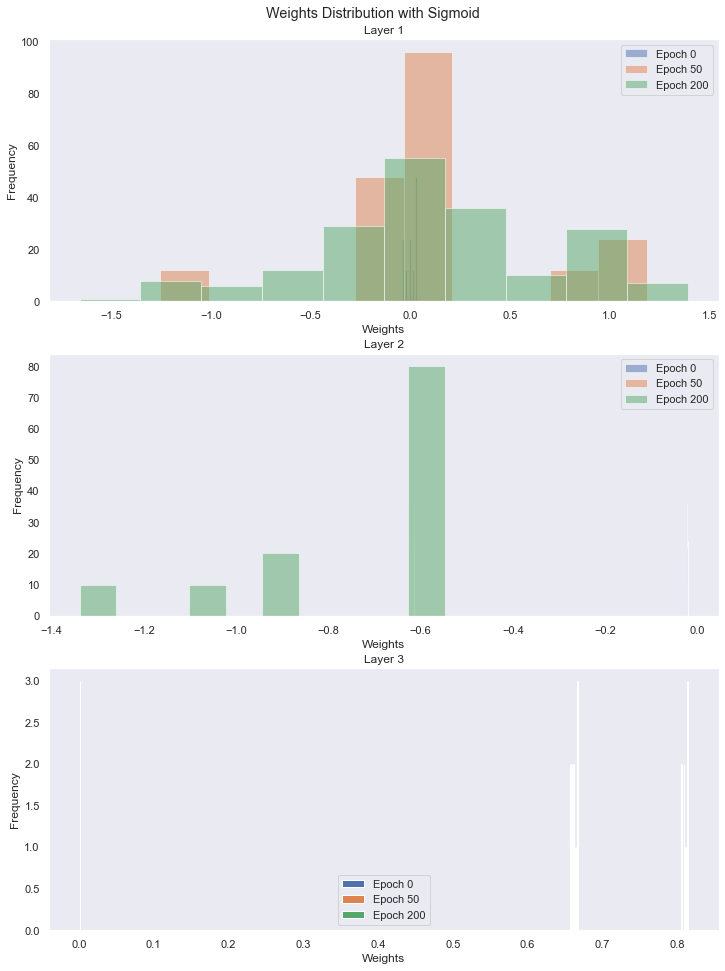

In [18]:
plot_weights_distribution(l1[1], l2[1], l3[1], activation = "Sigmoid")

## [Case 2] ReLU Activation Function on Each Layer

$$
ReLU(z) = max(0,z)
$$

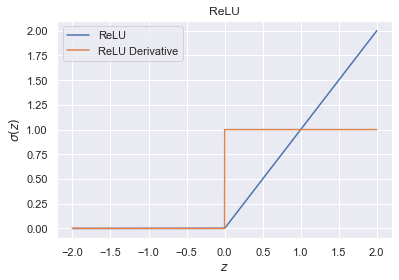

In [19]:
def relu(z):
    return np.maximum(0.0, z)

# ReLU derivative
def d_relu(z):
    return np.where(z <= 0, 0, 1)

x = np.linspace(-2,2, 10000)

plt.figure()
plt.plot(x, relu(x), label = "ReLU")
plt.plot(x, d_relu(x), label = "ReLU Derivative")
plt.grid(True)
plt.legend()
plt.xlabel("$z$")
plt.ylabel("$\sigma(z)$")
plt.title("ReLU")
plt.show();

## Model

In [20]:
model = BasicNetwork(nn.ReLU)

## Training

The model learns slowly, and after a few cycles, the training may become stagnant.

In [21]:
accuracy_history, loss_history, l1, l2, l3 = train(model, epochs = 200)

Epoch 0 Train Acc : 0.4959999918937683, Train Loss : 3.626939296722412
Epoch 20 Train Acc : 0.8579999804496765, Train Loss : 0.9494314193725586
Epoch 40 Train Acc : 0.8629999756813049, Train Loss : 0.9155228137969971
Epoch 60 Train Acc : 0.8550000190734863, Train Loss : 0.9006842374801636
Epoch 80 Train Acc : 0.8600000143051147, Train Loss : 0.8850530385971069
Epoch 100 Train Acc : 0.8569999933242798, Train Loss : 0.8858779072761536
Epoch 120 Train Acc : 0.8500000238418579, Train Loss : 0.8902552723884583
Epoch 140 Train Acc : 0.8500000238418579, Train Loss : 0.9186015129089355
Epoch 160 Train Acc : 0.8479999899864197, Train Loss : 0.9085819721221924
Epoch 180 Train Acc : 0.8569999933242798, Train Loss : 0.8655884861946106
Epoch 199 Train Acc : 0.847000002861023, Train Loss : 0.8699809312820435


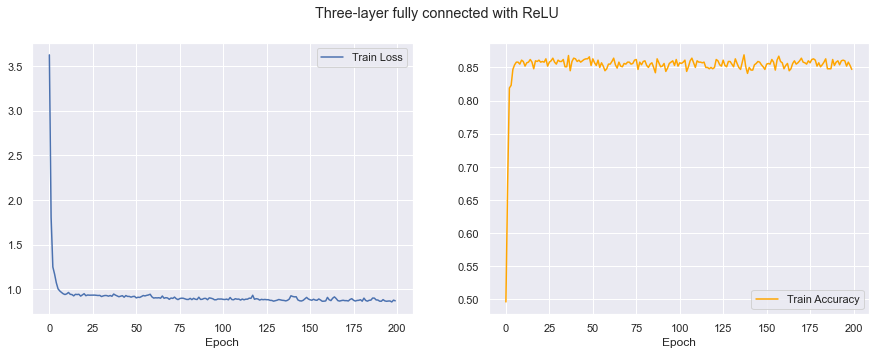

In [22]:
plot_model_history(loss_history, accuracy_history, activation = "ReLU")

## Analyzing the Gradient and Parameters Distribution
In the next Figure, We can observe the gradient distributions of a neural network as it learns.

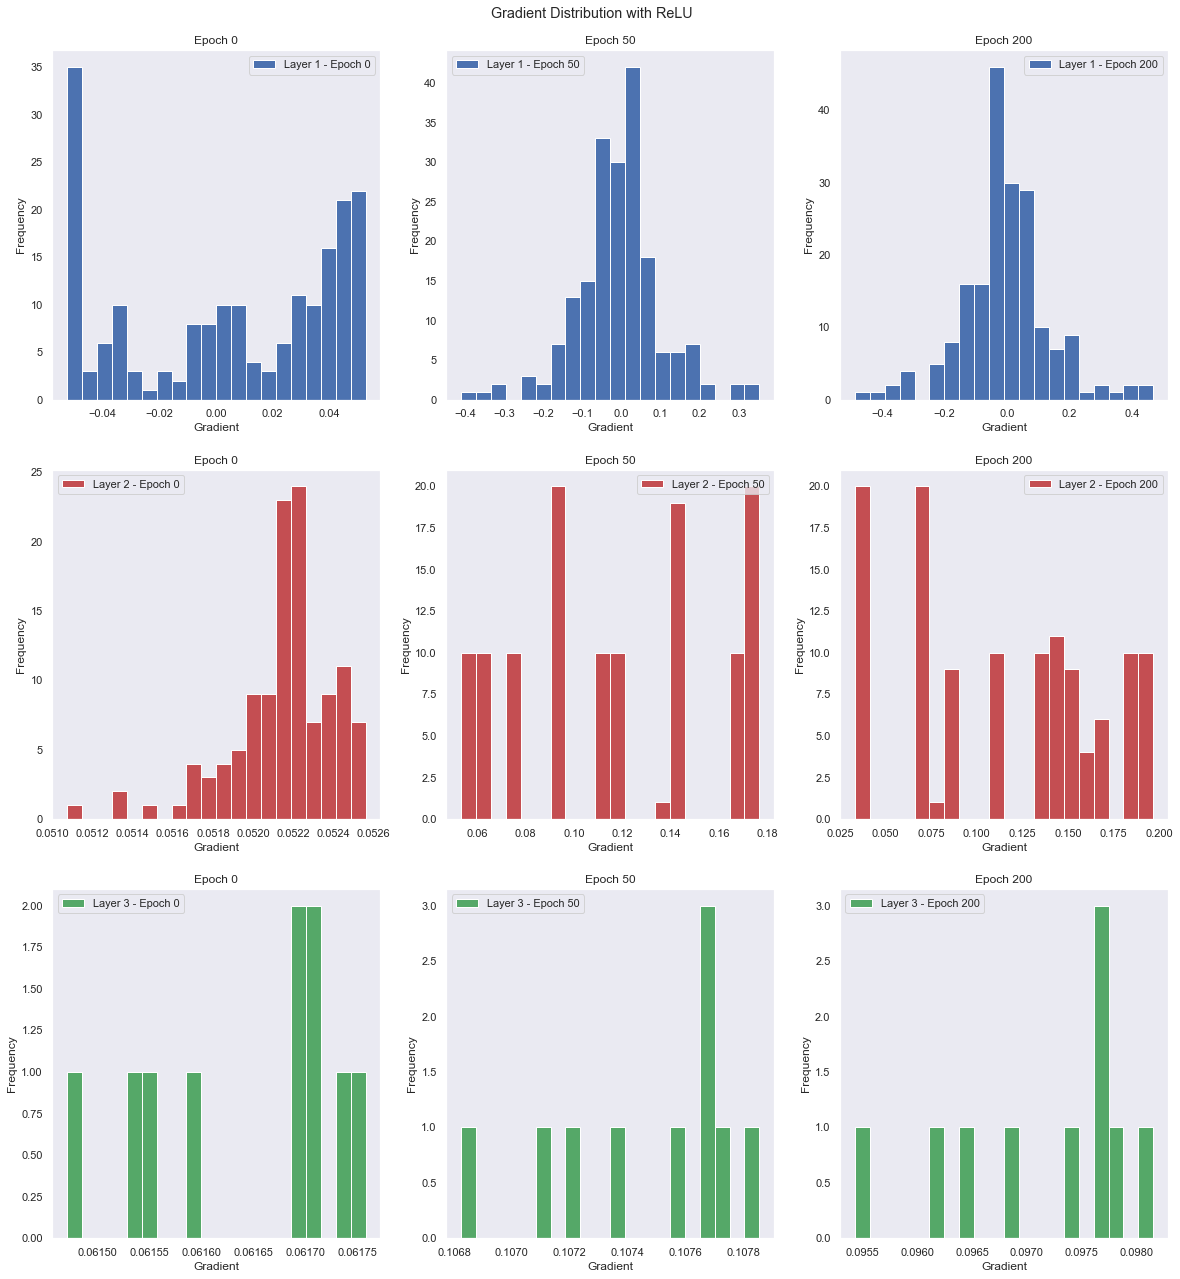

In [23]:
plot_gradient_distribution(l1[1], l2[1], l3[1], activation = "ReLU")

The **parameters** (weights) of the higher layers vary dramatically, whereas the **parameters** of the lower levels do not change significantly for **Vanishing** (or not at all).

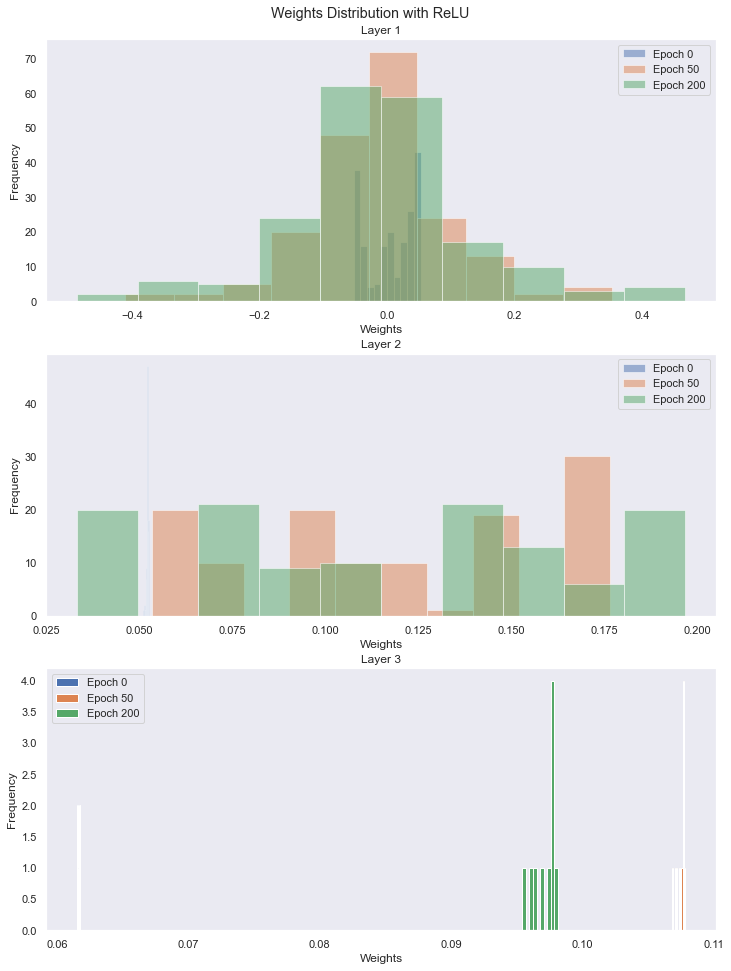

In [24]:
plot_weights_distribution(l1[1], l2[1], l3[1], activation = "ReLU")